# Bird Song Analysis

This package is a port of the [Sound Analysis Toolbox for Matlab](http://soundanalysispro.com/matlab-sat) in Python 3. It provides function to measure features of Zebra Finches songs, and to compare their similarities.

# Imports

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
import birdsonganalysis as bsa

First we load a wavfile, the output is a simple 1D array

In [3]:
sr, sig = wavfile.read('../songs/simple.wav')

# Spectral derivatives

We compute the spectral derivatives of the song. It is like a sonogram but we plot the slope of the power and not the power itself. It makes the sound features more visible. It uses [multitaper spectral analysis](https://en.wikipedia.org/wiki/Multitaper).

In [4]:
spec_der = bsa.spectral_derivs(sig)

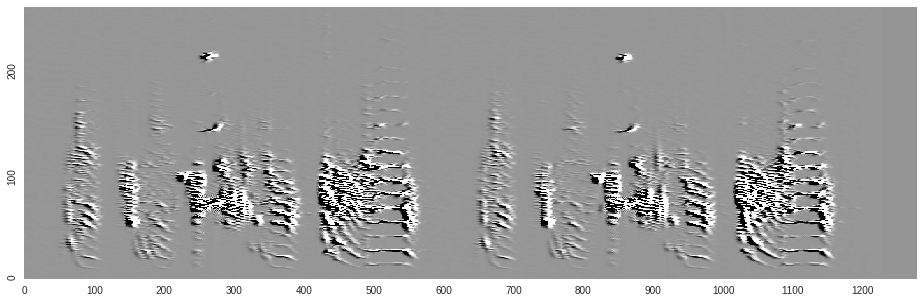

In [5]:
contrast = 0.008  # A smaller contrast saturates more but makes visible less saillant changes in the song spectrogram

fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_der, contrast, ax)  # Draws the spectral derivatives on the `ax`
plt.show(fig)


# Song Features

## Frequency Modulation

Frequency modulation is the absolute slope of the frequency along time. see [Frequency Modulation on SAP2011](http://soundanalysispro.com/manual-1/chapter-4-the-song-features-of-sap2/frequency-amplitude-modulation).

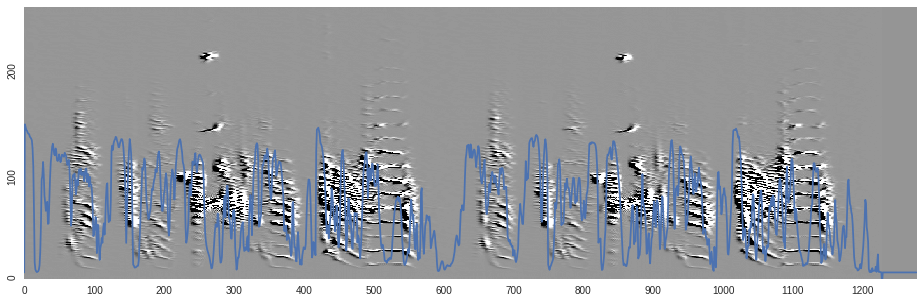

In [6]:
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_der, contrast, ax) 
fm = bsa.song_frequency_modulation(sig)
nfm = fm / (np.max(fm) - np.min(fm))
ax.plot(250-150*nfm)

## Amplitude Modulation

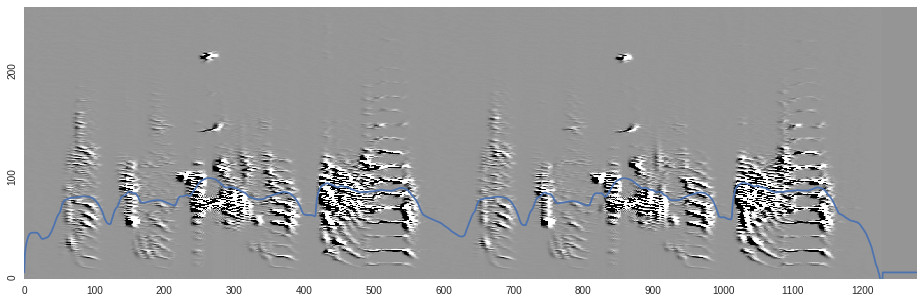

In [7]:
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_der, 0.01, ax)
ax.plot(250-bsa.song_amplitude_modulation(sig))

## Pitch

Pitch is computed with the Yin Algorithm

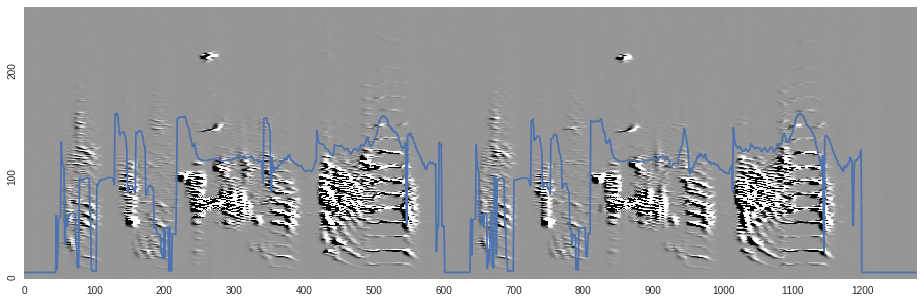

In [8]:
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_der, 0.01, ax)
pitches = bsa.song_pitch(sig, sr, threshold=0.7)
npitches = pitches / (np.max(pitches) - np.min(pitches))
ax.plot(250 - 150 * npitches)
plt.show(fig)

## Wiener Entropy

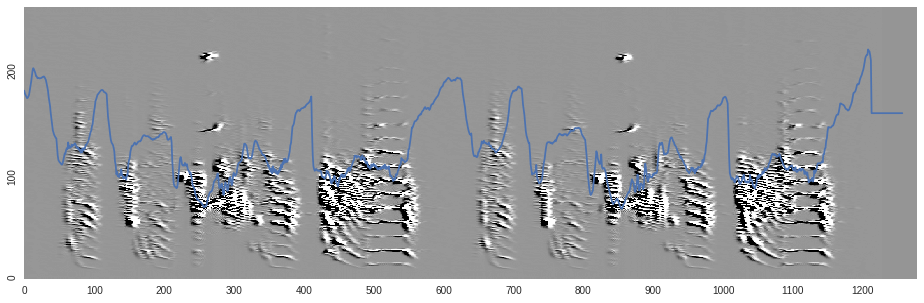

In [9]:
fig = plt.figure(figsize=(16, 5))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(spec_der, contrast, ax) 
wiener = bsa.song_wiener_entropy(sig)
nwiener = wiener / (np.max(wiener) - np.min(wiener))
ax.plot(100-150*nwiener)